Modellering er en kreativ prosess som styrker samarbeid, problemløsningsevne, kritisk tenkning og forståelse. Det er en sammensatt prosess som ikke bare handler om å kode, men om å dele opp større problemer i delproblemer, analysere disse delene og utvikle løsningsstrategier for problemene. Det handler om å utvikle og konstruere modeller for å forstå visse sider ved virkeligheten. Og det handler om å forstå styrkene og begrensningene ved disse modellene. Modellering og simuleringer gir elevene mulighet til å studere virkelighetsnære og komplekse problemer. Programmering er i den forbindelse spesielt viktig når vi møter problemer som er vanskelige eller helt umulige å løse med vanlige eksperimenter eller analytisk matematikk.

## Pendelforsøk
Et eksempel på nyttige simuleringer er i forbindelse med et klassisk forsøk der en skal prøve å finne ut hva som avgjør svingetida til en pendel. Her kan en studere hvorvidt lengden på snora, massen til kula eller slippvinkelen har noe effekt. Dette kan en gjøre med eksperimenter. Men en kan også sammenlikne med simuleringer for å få en dypere innsikt i hvilke feilkider en eventuelt har, i tillegg til at en kan studere effekten luftmotstand og gravitasjon har, noe som vanskelig lar seg gjøre på en vanlig naturfagslab!

Programmet nedenfor er et slikt "pendellaboratorium" som elever kan leke seg med, modifisere og endre som de vil. Simuleringer er både sikre, kostnadseffektive og tidsbesparende, så de kan gi mye når elever og naturvitere skal utforske ulike fenomener. Simuleringer er nå en naturlig del av naturvitenskapelige metode, og det kan derfor være en fordel at elevene får et innblikk i dette og kan bruke og/eller lage simuleringer selv.

In [1]:
from pylab import *
import pygame

# Variabler
g = 9.81          # Tyngdeakselerasjon
L = 0.5          # Lengden av snora i meter
k = 0           # luftmotstandskoeffisient

# Tidssteg
N = 1000
a = 0
b = 1
dt = (b-a)/N    

# Slippvinkel og vinkelfart
theta = pi/3
thprev = theta
w = 0               # Vinkelfart
wprev = 0

# Posisjonsinitiering
pos = zeros(2)
x = L*sin(theta)
y = -L*cos(theta)

# Setter opp Pygame
pygame.init()
vindux = 640
vinduy = 640
vindu = pygame.display.set_mode((vindux,vinduy))
pygame.display.set_caption("Pendel")
HVIT = (255,255,255)
SORT = (0,0,0)
vindu.fill(HVIT)

# Tegn pendel
vx2 =  int(vindux/2)        # x-posisjon til pendelen i vinduet
vy2 = int(vinduy/2)         # y-posisjon til pendelen i vinduet
pygame.draw.line(vindu,SORT,(vx2,1),(int(round(vx2*x+vx2)),-int(round(vinduy*y))))
pygame.draw.circle(vindu,SORT,(int(round(vx2*x+vx2)),-int(round(vinduy*y))),15)
pygame.display.update()

i = 0
run = True
while run:
    vindu.fill(HVIT)

    w = wprev - dt*g/L*sin(theta) - dt*k*wprev
    theta = thprev + dt*w

    thprev = theta
    wprev = w

    x = L*sin(theta)
    y = -L*cos(theta)

    if i+1 < N-1:
        i += 1
    else:
        i = 0

    pygame.draw.line(vindu,SORT,(vx2,1),(int(round(vindux*x+vx2)) ,-int(round(vinduy*y)))) 
    pygame.draw.circle(vindu,SORT,(int(round(vindux*x+vx2)) ,-int(round(vinduy*y))),15)
    pygame.display.update()

    for e in pygame.event.get():
       if e.type == pygame.QUIT:
           run = False

pygame.quit()

Det som er ekstra flott med slike programmer, er at det kan passe for mange ulike nivåer. De som aldri har sett noe særlig kode, kan kanskje nøye seg med å endre på variablene i starten av programmet, mens de som er drevne kodere og/eller fysikere, kan kikke litt på fysikken i simuleringsløkka. Mulighetene for differensiering med programmering er stor!

## Modellering av differensiallikninger

Differensiallikninger egner seg svært godt som utgangspunkt for modellering fordi de beskriver systemer som utvikler og endrer seg over tid. Newtons 2. lov, Newtons avkjølingslov, reaksjonsratelover og populasjonsmodeller er eksempler på sammenhenger som kan modelleres og studeres. Dette egner seg godt som et prosessorientert prosjektarbeid, og elevene bør få mulighet til å utforske åpne oppgaver som ikke legger for mye føringer. Dette kan være både krevende og frustrerende, men det er en særdeles viktig ferdighet å lære denne formen for problemløsning og kritisk tenkning.

### Populasjonsvekst
Her er et eksempel på hvordan en kan modellere populasjonsdynamikken i en økologisk populasjon. Det finnes mange modeller for akkurat dette, og vi kan se på et lite utvalg. Det viktigste er at elevene får drøfte seg imellom hvilke faktorer som er viktige å få med i modellene sine. Dette påvirker verdien til koeffisientene i likningene våre, i tillegg til at de må avgjøre hvilke sammenhenger og modeller de vil bruke for å representere ulike samspill og faktorer.

Noen eksempler på faktorer vi må ta hensyn til når vi skal studere en populasjon, og som elevene må drøfte seg imellom, er:

- Hvilket samspill har arten med andre arter?
- Hvilken tilgang har populasjonen på mat og andre nødvendige ressurser?
- Hvor stor plass har populasjonen til å utvide seg?
- Hvilke abiotiske (ikke-levende) faktorer påvirker populasjonen? Dette kan f.eks. være årstider, lys- og vindforhold, luftfuktighet, næringssalter osv.
- Hvilke sykdommer og parasitter finnes i økosystemet?

Det viktigste er ikke her at elevene kommer fram til et fasitsvar, men at de drøfter og begrunner valgene de tar. Dette har et stort potensiale til å gi god dybdelæring innenfor de fagene det gjelder.

En modell for populasjonsvekst er en enkel modell som kun tar hensyn til reproduksjon (representert ved reproduksjonsraten *a*). Her er det ingen begrensninger, og derfor ingen bæreevne. Vi tar utgangspunkt i bakterier som vokser i et maltoserikt medium. Endringen i antall bakterier kan da gis som:

\begin{equation}
B'(t) = aB(t)
\end{equation}

Et program som regner ut hvor mange bakterier *B* det er etter tida *t* gitt i timer, kan benytte seg av Eulers metode for å løse likningen. Programmet kan se slik ut:

Text(0,0.5,'Antall bakterier B')

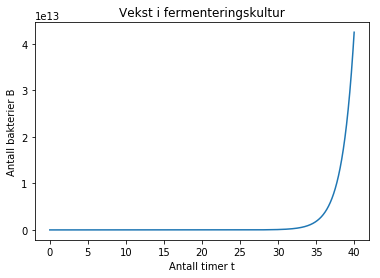

In [3]:
from pylab import *

#Initialbetingelser
t0 = 0           # Starttid
B0 = 500         # Antall bakterier ved t = 0
a = 0.63         # Reproduksjonsraten

#Tidssteg
N = 10000     # antall intervaller
tid = 40      # antall timer
dt = tid/N      

#Matriser
t = zeros(N)
B = zeros(N)
Bder = zeros(N)

# Initierer matrisene
t[0] = t0
B[0] = B0

# Eulers metode
for i in range(N-1):
    Bder[i] = a*B[i]  # Eksponentiell vekst - ingen begrensninger
    B[i+1] = B[i] + Bder[i]*dt
    t[i+1] = t[i] + dt
    
plot(t,B)
title('Vekst i fermenteringskultur')
xlabel('Antall timer t')
ylabel('Antall bakterier B')

Hvis vi vil, kan vi lett legge inn en annen modell, som baserer seg på at vi har en bæreevne på grunn av begrenset tilgang på f.eks. plass eller ressurser. Bæreevnen *b* er antallet individer som økosystemet stabiliserer seg rundt på grunn av dette. Modellen ser da slik ut:

\begin{equation}
B'(t) = aB(t)\left(1-\frac{B(t)}{b}\right)
\end{equation}

Det skal ikke store endringene til i programmet vårt for å implementere denne modellen. Det er kun to linjer som må endres: bæreevnen må innføres som en konstant, og uttrykket for den deriverte (endringen) av bakteriene i løkka må skiftes ut med den nye modellen vår.

Text(0,0.5,'Antall bakterier B')

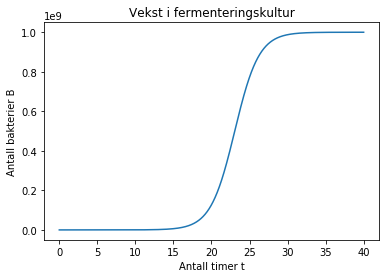

In [4]:
from pylab import *

#Initialbetingelser
t0 = 0         # Starttid
B0 = 500       # Antall bakterier ved t = 0
a = 0.63       # Reproduksjonsraten
b = 1E9        # Bæreevne (antall individer)
 
#Tidssteg
N = 10000     # antall intervaller
tid = 40      # antall timer
dt = tid/N        

#Matriser
t = zeros(N)
B = zeros(N)
Bder = zeros(N)

# Initierer matrisene
t[0] = t0
B[0] = B0

# Eulers metode
for i in range(N-1):
    Bder[i] = a*B[i]*(1 - B[i]/b)      # Logistisk vekst med bæreevne
    B[i+1] = B[i] + Bder[i]*dt
    t[i+1] = t[i] + dt
    
plot(t,B)
title('Vekst i fermenteringskultur')
xlabel('Antall timer t')
ylabel('Antall bakterier B')

Her ser vi at populasjonen stabiliserer seg etter at de har blitt 1 milliard individer pga. mangel på plass/ressurser. Vi kan også innføre en art som spiser bakteriene våre, f.eks. en amøbe. Da blir programmet litt mer komplisert, og spesielt plottingen er litt utfordrende. Men modelleringsprosessen er nokså lik, og det mest spennende ligger i tolkningen av disse modellene og diskusjonene mellom elevene. En modell for et samspill mellom to arter, der den ene arten spiser den andre, kan være slik:

\begin{equation}
B'(t) = aB(t)\left(1-\frac{B(t)}{b}\right) - cB(t)A(t)
\end{equation}

Tilsvarende må vi se på endringen i amøbepopulasjonen:

\begin{equation}
A'(t) = dB(t)A(t) - eA(t)
\end{equation}

Hvis vi studerer likningene, kan vi se at første ledd i bakterilikningen vår ikke er noe annerledes enn sist. Men vi har fått et ledd til som er negativt, og som avhenger av både antallet bakterier og amøber. Dette er et ledd som sier noe om hvor fort bakteriene blir spist av amøber. Og selvsagt er det avhengig av hvor mange bakterier og amøber det er. I tillegg har vi koeffisienten *c* som sier noe om hvor ofte de møter hverandre og hvor gode amøbene er på å fange og spise bakterier. Dette er blant annet avhengig av hvor stor plass de har, og hvor lett det er å "gjemme seg" for bakteriene.

Tilsvarende er det et ledd i amøbelikningen som likner på det leddet som reduserte bakteriepopulasjonen. Men vi har et annet fortegn og en annen koeffisient. Fortegnet er åpenbart positivt fordi det blir flere amøber dersom de får tilgang på bakterier. Koeffisienten *d* må være forskjellig fra *c* (og ofte mindre) fordi det dør en bakterie hver gang de møtes og amøben spiser bakterien, men det dannes ikke tilsvarende en ny amøbe! Dette kan gi en interessant diskusjon med elevene. Det siste leddet er amøbens naturlige dødsrate.

En kan spørre seg om hvorfor amøben ikke begrense av en bæreevne, men gitt at den bare har bakterier å livnære seg på, begrenses den naturlig av dette. Det kan selvsagt diskuteres om det er andre faktorer som påvirker amøbepopulasjonen, og her ligger det mye faglig godteri som en kan kose seg med.

Nedenfor er et program som modellerer bakterie- og amøbeveksten. Vi ser at reproduksjonsraten til bakteriene har gått ned, og vi kan diskutere hvorfor med elevene våre. Antakelig er det fordi en under en stresset situasjon ikke reproduserer så mye som når det ikke er fiender i økosystemet. Det kan være lurt å gi plottedelen av programmet til elevene snarere enn å be dem finne ut av det selv. Plotttingen er såpass spesiell at den neppe bør være pensum til eksamen.

(0, 100.0)

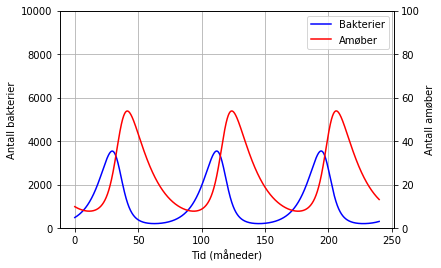

In [5]:
from pylab import *

#Initialbetingelser
B0 = 500       # Antall bakterier ved t = 0
A0 = 10        # Antall amøber ved t = 0
a = 0.12         # Reproduksjonsraten til bakteriene
b = 1E9      # Bæreevnen til bakteriene
c = 0.005         # Bakterie-amøbe møterate
d = 0.00005       # Bakterie-amøbe møterate 2
e = 0.06         # Dødsrate for amøber

#Tidssteg
N = 100000     # antall intervaller
tid = 24*10      # antall timer
dt = tid/N        

#Matriser
t = zeros(N)
B = zeros(N)
A = zeros(N)
Bder = zeros(N)
Ader = zeros(N)

# Initierer matrisen
B[0] = B0
A[0] = A0

# Eulers metode
for i in range(N-1):
    Bder[i] = a*B[i]*(1 - B[i]/b)  - c*B[i]*A[i]
    Ader[i] = d*B[i]*A[i] - e*A[i]
    B[i+1] = B[i] + Bder[i]*dt
    A[i+1] = A[i] + Ader[i]*dt
    t[i+1] = t[i] + dt


# Plotting (vanskelig)
fig = figure()
ax = fig.add_subplot(111)
data1 = ax.plot(t, B, '-b', label = 'Bakterier')
ax2 = ax.twinx()
data2 = ax2.plot(t, A, '-r', label = 'Amøber')

data = data1 + data2
datatittel = [l.get_label() for l in data]
ax.legend(data, datatittel, loc=0)

ax.grid()
ax.set_xlabel("Tid (måneder)")
ax.set_ylabel("Antall bakterier")
ax2.set_ylabel("Antall amøber")
ax.set_ylim(0,1E4)
ax2.set_ylim(0, 1E2)